## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Business Problem 1

In [2]:
loan_data = pd.read_csv(r"C:\Users\MAGICPIN\Desktop\all csv\assign\Basic Statistics - Hypothesis Testing\LoansData.csv")
loan_data.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [3]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount.Requested,2499.0,12405.462185,7802.933666,1000.00,6000.0,10000.0,17000.0,35000.0
Amount.Funded.By.Investors,2499.0,12002.374186,7746.767348,-0.01,6000.0,10000.0,16000.0,35000.0
Monthly.Income,2499.0,5688.931321,3963.118185,588.50,3500.0,5000.0,6800.0,102750.0
Open.CREDIT.Lines,2497.0,10.072887,4.507416,2.00,7.0,9.0,13.0,38.0
Revolving.CREDIT.Balance,2497.0,15223.184622,18281.015258,0.00,5584.0,10948.0,18861.0,270800.0
Inquiries.in.the.Last.6.Months,2497.0,0.906688,1.231149,0.00,0.0,0.0,1.0,9.0


In [4]:
#Information about the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

### Handeling Missing Value

## a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)
H0 = NO, Intrest rate is varied for different loan amount
H1 = Intrest rate is varied for different loan amount
CI - 95% 
p - 0.05

In [5]:
loan_data.head(2)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [6]:
loan_data["Interest.Rate"].value_counts()

12.12%    122
7.90%     119
13.11%    115
15.31%     76
14.09%     72
         ... 
11.09%      1
23.33%      1
14.18%      1
18.62%      1
19.04%      1
Name: Interest.Rate, Length: 275, dtype: int64

In [7]:
loan_data["Amount.Requested"].value_counts()

10000.0    206
12000.0    151
5000.0     110
20000.0    107
6000.0     103
          ... 
1675.0       1
16550.0      1
31075.0      1
9550.0       1
8475.0       1
Name: Amount.Requested, Length: 380, dtype: int64

In [8]:
#Cardinality of variables
loan_data.nunique()

Amount.Requested                   380
Amount.Funded.By.Investors         710
Interest.Rate                      275
Loan.Length                          2
Loan.Purpose                        14
Debt.To.Income.Ratio              1669
State                               46
Home.Ownership                       5
Monthly.Income                     632
FICO.Range                          38
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   11
dtype: int64

In [9]:
loan_data.groupby("Interest.Rate")["Amount.Requested"].mean()

Interest.Rate
10.00%     9725.000000
10.08%    15700.000000
10.16%    11615.957447
10.20%     3000.000000
10.25%    14406.250000
              ...     
9.63%     10027.272727
9.76%      9814.285714
9.88%     10487.500000
9.91%     14315.384615
9.99%      9654.545455
Name: Amount.Requested, Length: 275, dtype: float64

In [10]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount.Requested,2499.0,12405.462185,7802.933666,1000.00,6000.0,10000.0,17000.0,35000.0
Amount.Funded.By.Investors,2499.0,12002.374186,7746.767348,-0.01,6000.0,10000.0,16000.0,35000.0
Monthly.Income,2499.0,5688.931321,3963.118185,588.50,3500.0,5000.0,6800.0,102750.0
Open.CREDIT.Lines,2497.0,10.072887,4.507416,2.00,7.0,9.0,13.0,38.0
Revolving.CREDIT.Balance,2497.0,15223.184622,18281.015258,0.00,5584.0,10948.0,18861.0,270800.0
Inquiries.in.the.Last.6.Months,2497.0,0.906688,1.231149,0.00,0.0,0.0,1.0,9.0


In [11]:
loan_data.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [12]:
loan_data.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [13]:
catagorical_col = ['Interest.Rate','Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State','Home.Ownership',
                   'FICO.Range', 'Open.CREDIT.Lines','Inquiries.in.the.Last.6.Months', 'Employment.Length' ]
continious_col = ['Amount.Requested', 'Amount.Funded.By.Investors', 'Monthly.Income','Revolving.CREDIT.Balance']

In [14]:
# Treating missing values
for col in catagorical_col:
    loan_data[col] = loan_data[col].fillna(loan_data[col].mode()[0])
loan_data[continious_col] = loan_data[continious_col].fillna(loan_data[continious_col].mean())
loan_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


loan_data.isna().sum()

In [15]:
loan_data["Interest.Rate"] = loan_data["Interest.Rate"].astype(str).str.replace('%', '')

In [16]:
loan_data['Interest.Rate'] = (loan_data['Interest.Rate'].str.strip('%').astype(float))

### hence we have 2 continious variables in our data so we will use pearson test to find relationship among them

In [17]:
stats.pearsonr(loan_data["Interest.Rate"] , loan_data["Amount.Requested"] )

(0.33240946119905634, 1.4646809963138709e-65)

### Business conclusion: We reject H0 - No relationship as p-value is very less Ha - There is a relationship among the variables with 95% accuracy Hence Intrest rate is varied for different loan amounts

## b. Loan length is directly effecting intrest rate.
H0 = No, length is not directly effecting the interesat rate

H1 = length is effecting the interest rate
CI = 95%
p value = 0.05

In [18]:
loan_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [19]:
loan_data["Loan.Length"].value_counts()

36 months    1952
60 months     548
Name: Loan.Length, dtype: int64

In [20]:
loan_data["Loan.Length"].nunique()

2

In [21]:
loan_data.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [22]:
usage = 'Interest.Rate'

In [23]:
s1 = loan_data.loc[loan_data["Loan.Length"] == '36 months', usage]
s2 = loan_data.loc[loan_data["Loan.Length"] == '60 months', usage]
print('mean s1' , s1.mean() ,'mean s2' ,s2.mean())

mean s1 12.126173155737813 mean s2 16.40746350364961


In [24]:
stats.f_oneway(s1,s2)

F_onewayResult(statistic=548.3261736091927, pvalue=8.529143234124184e-110)

### Buisness conclusion :We reject the H0 Hypothesis Loan length is directly effecting intrest rate as p- value is very low with 99.99% accuracy.

## c. Inrest rate varies for different purpose of loans
H0 = No , interest rate is not varied with different purpose of loans

H1 = yes , interest rate is not varied with different purpose of loans

CI = 95%

p-value = 0.05

In [25]:
loan_data["Loan.Purpose"].value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [26]:
obs_freq = pd.crosstab( loan_data['Interest.Rate'], loan_data['Loan.Purpose'] )
obs_freq.T

Interest.Rate,5.42,5.79,5.99,6.00,6.03,6.17,6.54,6.62,6.76,6.91,...,23.28,23.33,23.63,23.76,23.83,23.91,24.20,24.33,24.70,24.89
Loan.Purpose,,,,,,,,,,,,,,,,,,,,,
car,0,1,0,0,3,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
credit_card,2,2,1,0,7,0,1,11,0,1,...,1,0,0,1,0,0,0,0,1,0
debt_consolidation,0,5,4,0,24,1,3,24,2,5,...,3,1,1,5,2,1,1,1,1,1
educational,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
home_improvement,5,2,3,1,5,1,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
house,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
major_purchase,1,1,1,0,6,2,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
medical,1,0,0,0,2,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
moving,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
stats.chi2_contingency(obs_freq.T)

(4378.952129804514,
 8.396099408489274e-20,
 3562,
 array([[0.22  , 0.28  , 0.2   , ..., 0.02  , 0.04  , 0.04  ],
        [1.9536, 2.4864, 1.776 , ..., 0.1776, 0.3552, 0.3552],
        [5.7508, 7.3192, 5.228 , ..., 0.5228, 1.0456, 1.0456],
        ...,
        [0.3828, 0.4872, 0.348 , ..., 0.0348, 0.0696, 0.0696],
        [0.0924, 0.1176, 0.084 , ..., 0.0084, 0.0168, 0.0168],
        [0.1716, 0.2184, 0.156 , ..., 0.0156, 0.0312, 0.0312]]))

### Business conclusion: We reject the H0 Hypothesis Interest rate varies for different purpose of loans as p- value is very low with 99.99% accuracy.

## d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

H0- there is no relationship b/w FICO scores and home ownership

H1- there is relationship b/w FICO scores and home ownership

CI- 95%

P value- 0.05

In [28]:
loan_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [29]:
loan_data["Home.Ownership"].value_counts()

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [30]:
obs_freq2 = pd.crosstab(loan_data["Home.Ownership"], loan_data["FICO.Range"])
obs_freq2

FICO.Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home.Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,68,79,55,61,...,21,12,15,7,7,6,5,6,0,1
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,91,75,91,65,...,4,5,4,5,2,3,2,0,0,0


In [31]:
stats.chi2_contingency(obs_freq2)

(473.5648028168521,
 1.0065160858471904e-35,
 148,
 array([[2.29600e+00, 1.37760e+00, 4.59200e-01, 1.83680e+00, 5.74000e+01,
         6.65840e+01, 7.94416e+01, 7.62272e+01, 7.20944e+01, 6.24512e+01,
         6.42880e+01, 7.02576e+01, 6.01552e+01, 6.15328e+01, 5.14304e+01,
         4.27056e+01, 5.23488e+01, 4.31648e+01, 4.31648e+01, 2.98480e+01,
         2.43376e+01, 2.47968e+01, 2.80112e+01, 2.11232e+01, 2.11232e+01,
         1.65312e+01, 7.80640e+00, 1.01024e+01, 1.28576e+01, 8.72480e+00,
         9.18400e+00, 5.96960e+00, 5.96960e+00, 5.05120e+00, 3.67360e+00,
         2.75520e+00, 4.59200e-01, 4.59200e-01],
        [2.00000e-03, 1.20000e-03, 4.00000e-04, 1.60000e-03, 5.00000e-02,
         5.80000e-02, 6.92000e-02, 6.64000e-02, 6.28000e-02, 5.44000e-02,
         5.60000e-02, 6.12000e-02, 5.24000e-02, 5.36000e-02, 4.48000e-02,
         3.72000e-02, 4.56000e-02, 3.76000e-02, 3.76000e-02, 2.60000e-02,
         2.12000e-02, 2.16000e-02, 2.44000e-02, 1.84000e-02, 1.84000e-02,
         1.4

### Business conclusion: We reject the H0 Hypothesis.

## Buisness problem 2 -

In [32]:
price = pd.read_csv(r"C:\Users\MAGICPIN\Desktop\all csv\assign\Basic Statistics - Hypothesis Testing\Price_Quotes.csv")
price.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [33]:
price.shape

(12, 3)

In [34]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [35]:
barry_price_mean = price.Barry_Price.mean()
mary_price_mean = price.Mary_Price.mean()


In [36]:
barry_price_mean

124.33333333333333

In [37]:
mary_price_mean

114.75

In [38]:
stats.ttest_rel(price.Barry_Price ,price.Mary_Price  )

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

###  We fail to reject the H0 Business Conclusion: With the given data, cant be proved any difference in the average price quotes provided by Mary and Barry.

## Buisness Problem -3 

In [39]:
Treatment_Facility = pd.read_csv(r"C:\Users\MAGICPIN\Desktop\all csv\assign\Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")
Treatment_Facility.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [40]:
Treatment_Facility.Reengineer.value_counts()

Prior    13
Post      7
Name: Reengineer, dtype: int64

In [41]:
usage = 'Employee_Turnover'

Prior_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Prior', usage ]
Post_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Post', usage ]

print( 'mean of Prior_Reengineer: ', Prior_Reengineer.mean(), '| mean of Post_Reengineer: ', Post_Reengineer.mean() )


mean of Prior_Reengineer:  11.735692307692307 | mean of Post_Reengineer:  18.68912857142857


To determine if the reengineering effort changed the critical incidence rate
H0 - u1 = u2 Ha - u1 <> u2 CI - 95% p - 0.05

In [42]:
stats.ttest_ind( Prior_Reengineer, Post_Reengineer )

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

In [43]:
stats.f_oneway( Prior_Reengineer, Post_Reengineer )

F_onewayResult(statistic=3.133985828895568, pvalue=0.09361109345535291)

Output: We fail to reject the H0 Business Conclusion: With the given data, cant be proved if the reengineering effort changed the critical incidence rate as p-value > 0.05.


-Is there evidence that the critical incidence rate improved?

In [44]:
Treatment_Facility.rename(columns = {'VAR4':'TRFF', 'VAR5':'CI'}, inplace = True)

In [45]:
Treatment_Facility.head()

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


### H0 - means are from same population Ha - means are from different population CI - 95% p - 0.05

In [46]:
usage = "CI"

In [47]:
Prior_Reengineer_CI = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Prior', usage ]
Post_Reengineer_CI = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Post', usage ]

print( 'mean of Prior_Reengineer_CI : ', Prior_Reengineer_CI.mean(), '| mean of Post_Reengineer_CI : ', Post_Reengineer_CI.mean() )

mean of Prior_Reengineer_CI :  53.887906321846145 | mean of Post_Reengineer_CI :  23.34971927988571


In [48]:
stats.f_oneway( Prior_Reengineer_CI, Post_Reengineer_CI )

F_onewayResult(statistic=2.650105376271948, pvalue=0.12091989189884142)

### Output: We fail to reject the H0 Business Conclusion: With the given data, cant be proved if the reengineering effort changed the critical incidence rate as p-value > 0.05.

   ## Buisness Problem - 4

In [49]:
#Importing the data set
Priority_Assessment = pd.read_csv(r"C:\Users\MAGICPIN\Desktop\all csv\assign\Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")
Priority_Assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [50]:
Priority_Assessment["Priority"].value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [55]:
user = "Days"
s1 = Priority_Assessment.loc[Priority_Assessment["Priority"] == "High", user]
s2 = Priority_Assessment.loc[Priority_Assessment["Priority"] == "Medium", user]
s3 = Priority_Assessment.loc[Priority_Assessment["Priority"] == "Low", user]

print("mean High_Priority : ", s1.mean() ,"mean medioum_priortiy : " , s2.mean() , "mean low priority : ", s3.mean())

mean High_Priority :  3.023619631901845 mean medioum_priortiy :  2.5000000000000004 mean low priority :  4.228358208955225


In [56]:
stats.f_oneway( s1, s2, s3 )

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

### Business conclusion:
  We fail to reject the H0
  Hence we are 95% confident that there is no difference in on the prioritization system as p-value is > 0.05

## Business Problem - 5

In [57]:
Films = pd.read_csv(r"C:\Users\MAGICPIN\Desktop\all csv\assign\Basic Statistics - Hypothesis Testing\Films.csv")
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


### DATA Pre-Processing

In [58]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [59]:
Films.nunique()

_rowstate_         1
Movie              3
Gender             4
Marital_Status     5
Sinage             5
Parking            5
Clean              5
Overall            5
Age                4
Income             3
Hear_About        11
dtype: int64

In [61]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [62]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [63]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [64]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


### Treating the null values
#### Filling the Missing Values for Ordinal and Nominal Categorical Variables with the Mode of the variables

In [69]:
Films['Hear_About'] = Films['Hear_About'].fillna(Films['Hear_About'].mode()[0])
Films['Sinage'] = Films['Sinage'].fillna(Films['Sinage'].mode()[0])
Films['Parking'] = Films['Parking'].fillna(Films['Parking'].mode()[0])
Films['Clean'] = Films['Clean'].fillna(Films['Clean'].mode()[0])
Films['Overall'] = Films['Overall'].fillna(Films['Overall'].mode()[0])
Films['Income'] = Films['Income'].fillna(Films['Income'].mean())
Films['Age'] = Films['Age'].fillna(Films['Age'].mode()[0])

In [70]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [71]:
Films.dtypes

_rowstate_          int64
Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

C:\Users\MAGICPIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


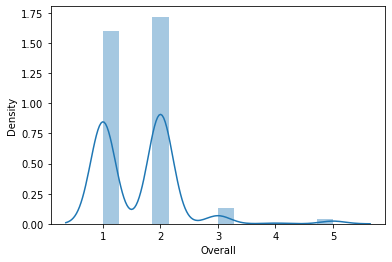

In [72]:
# Distribution of variables
sns.distplot(Films.Overall)
plt.show()

In [73]:
Films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [74]:
Films.corr()

,_rowstate_,Sinage,Parking,Clean,Overall,Age,Income
_rowstate_,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sinage,NaN,1.000000,0.469180,0.349144,0.382103,-0.089461,-0.036968
Parking,NaN,0.469180,1.000000,0.440771,0.514429,-0.023468,-0.023575
Clean,NaN,0.349144,0.440771,1.000000,0.350822,-0.000114,0.016643
Overall,NaN,0.382103,0.514429,0.350822,1.000000,-0.032904,-0.005568
Age,NaN,-0.089461,-0.023468,-0.000114,-0.032904,1.000000,0.136119
Income,NaN,-0.036968,-0.023575,0.016643,-0.005568,0.136119,1.000000


<AxesSubplot:>

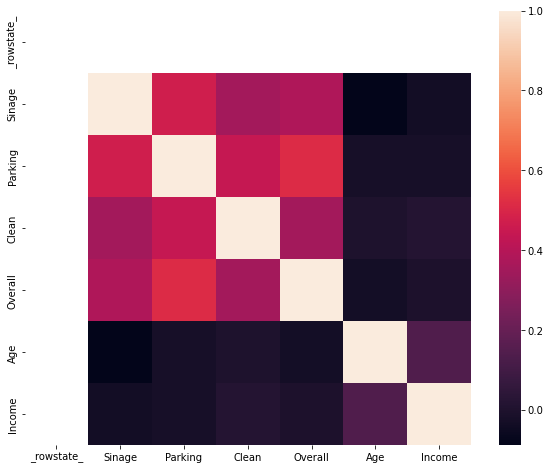

In [76]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(Films.corr())

In [77]:
Films.Marital_Status.value_counts()

2          210
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [78]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

### H0 - No relationship Ha - There is a relationship among the variables
CI - 95% p - 0.05

In [79]:
obs_freq01 = pd.crosstab(Films.Gender, Films.Overall)
obs_freq01

Overall,1.0,2.0,3.0,4.0,5.0
Gender,,,,,
1,46,51,6,0,1
2,90,96,5,1,2
Female,12,7,0,0,0
Male,3,8,1,0,1


In [81]:
stats.chi2_contingency(obs_freq01)

(12.505799976178544,
 0.40595925068113825,
 12,
 array([[4.75878788e+01, 5.10545455e+01, 3.78181818e+00, 3.15151515e-01,
         1.26060606e+00],
        [8.87696970e+01, 9.52363636e+01, 7.05454545e+00, 5.87878788e-01,
         2.35151515e+00],
        [8.69393939e+00, 9.32727273e+00, 6.90909091e-01, 5.75757576e-02,
         2.30303030e-01],
        [5.94848485e+00, 6.38181818e+00, 4.72727273e-01, 3.93939394e-02,
         1.57575758e-01]]))

Overall Satisfaction: These high levels of satisfaction are wonderful news for the promoters, sponsors, 
and customers of Film on the Rocks. Only five customers reported Poor or Very Poor satisfaction!

### Chi Square between Sinage and Overall

H0 - No relationship Ha - There is a relationship among the variables

CI - 95% p - 0.05

In [82]:
obs_freq02 = pd.crosstab(Films.Sinage,Films.Overall)
obs_freq02

Overall,1.0,2.0,3.0,4.0,5.0
Sinage,,,,,
1.0,90,22,0,0,1
2.0,44,109,4,0,1
3.0,13,25,8,1,1
4.0,2,4,0,0,0
5.0,2,2,0,0,1


In [83]:
stats.chi2_contingency(obs_freq02)

(125.61859671027881,
 4.53298970003405e-19,
 16,
 array([[5.17060606e+01, 5.54727273e+01, 4.10909091e+00, 3.42424242e-01,
         1.36969697e+00],
        [7.22969697e+01, 7.75636364e+01, 5.74545455e+00, 4.78787879e-01,
         1.91515152e+00],
        [2.19636364e+01, 2.35636364e+01, 1.74545455e+00, 1.45454545e-01,
         5.81818182e-01],
        [2.74545455e+00, 2.94545455e+00, 2.18181818e-01, 1.81818182e-02,
         7.27272727e-02],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02]]))

 Buisness outcome : there is strong relationship b/w Sinage and Overall

### Chi Square between Clean and Overall
H0 - No relationship Ha - There is a relationship among the variables

CI - 95% p - 0.05

In [84]:
obs_freq3 = pd.crosstab( Films.Clean, Films.Overall )

In [85]:
obs_freq3

Overall,1.0,2.0,3.0,4.0,5.0
Clean,,,,,
1.0,104,35,3,0,2
2.0,39,109,5,1,1
3.0,6,14,4,0,0
4.0,1,4,0,0,0
5.0,1,0,0,0,1


In [86]:
stats.chi2_contingency( obs_freq3 )

(127.71945555999517,
 1.7772535915434025e-19,
 16,
 array([[6.58909091e+01, 7.06909091e+01, 5.23636364e+00, 4.36363636e-01,
         1.74545455e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.09818182e+01, 1.17818182e+01, 8.72727273e-01, 7.27272727e-02,
         2.90909091e-01],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02],
        [9.15151515e-01, 9.81818182e-01, 7.27272727e-02, 6.06060606e-03,
         2.42424242e-02]]))

In [87]:
# Hence we can conclude that strong retationship between Clean and Overall Satisfaction

### Contingency tables for all Variables

In [88]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Gender, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Gender,1,2,Female,Male
Movie,,,,
Ferris Buellers Day Off,38.0,67.0,19.0,13.0
Old School,13.0,19.0,NaN,NaN
Willy Wonka,53.0,108.0,NaN,NaN


In [89]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Sinage, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Sinage,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,53.0,64.0,19.0,NaN,1.0
Old School,12.0,13.0,4.0,2.0,1.0
Willy Wonka,48.0,81.0,25.0,4.0,3.0


In [90]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Parking, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Parking,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,54.0,66.0,11.0,5.0,1.0
Old School,17.0,11.0,3.0,NaN,1.0
Willy Wonka,64.0,78.0,15.0,2.0,2.0


In [91]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Clean, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Clean,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,61.0,62.0,12.0,2.0,NaN
Old School,12.0,16.0,3.0,NaN,1.0
Willy Wonka,71.0,77.0,9.0,3.0,1.0


In [92]:
pd.crosstab(index = Films.Movie,
            columns = Films.Overall,
            values = Films.Gender,
            aggfunc = 'count'  )

Overall,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,59.0,71.0,4.0,1.0,2.0
Old School,21.0,10.0,NaN,NaN,1.0
Willy Wonka,71.0,81.0,8.0,NaN,1.0


In [93]:
pd.crosstab(index = Films.Movie,
            columns = Films.Age,
            values = Films.Gender,
            aggfunc = 'count'  )

Age,1.0,2.0,3.0,4.0
Movie,,,,
Ferris Buellers Day Off,12.0,70.0,48.0,7.0
Old School,2.0,20.0,10.0,NaN
Willy Wonka,12.0,87.0,59.0,3.0


In [94]:
pd.crosstab(index = Films.Movie,
            columns = Films.Income,
            values = Films.Gender,
            aggfunc = 'count'  )

Income,1.000000,1.834395,2.000000,3.000000
Movie,,,,
Ferris Buellers Day Off,54.0,7.0,39.0,37.0
Old School,14.0,NaN,7.0,11.0
Willy Wonka,74.0,9.0,36.0,42.0


In [95]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Marital_Status, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Marital_Status,1,2,Married,Single,Slngle
Movie,,,,,
Ferris Buellers Day Off,29.0,76.0,12.0,18.0,2.0
Old School,11.0,21.0,NaN,NaN,NaN
Willy Wonka,48.0,113.0,NaN,NaN,NaN
